In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import EDA
import regression
import outlier


df = pd.read_csv('ship-data.csv')
train_index = int(df.shape[0] * .8)
df_train = df[:train_index]
df_test = df[train_index:]

# Speed
v = df[df.columns[11]].values
u = df[df.columns[12]].values
x = np.concatenate([v.reshape(-1, 1), u.reshape(-1, 1)], axis=1)
prd = outlier.Rc(x).fit(.002)
df.loc[prd == -1, 'Speed Through Water (knots)'] = df.loc[prd == -1, 'Speed Over Ground (knots)']

# Draft
df.loc[df[df.columns[6]]==0, df.columns[6]] = df.loc[df[df.columns[6]]==0, df.columns[7]]
df.loc[791:796, df.columns[19]] = df.loc[781:790, df.columns[19]].mean()
df.loc[2194:2211, df.columns[19]] = df.loc[2192:2193, df.columns[19]].mean()

# Power
power = ['Time', 'Shaft Speed (RPM)', 'Shaft Torque (kNm)',
       'Shaft Power (kW)']
df_all = df.drop(power, 1)

df_train = df_all[:train_index]
df_test = df_all[train_index:]

xtr = df_train.drop('Main Engine Fuel Consumption (MT/day)', 1).values
ytr = df_train['Main Engine Fuel Consumption (MT/day)'].values.reshape(-1, 1)

xte = df_test.drop('Main Engine Fuel Consumption (MT/day)', 1).values
yte = df_test['Main Engine Fuel Consumption (MT/day)'].values.reshape(-1, 1)

df1 = df_all.drop('Speed Over Ground (knots)', 1)
df1['Trim'] = df1['Draft Forward (meters)'] - df1['Draft Aft (meters)']

pca = PCA(n_components=1, random_state=42)
df1['Draft'] = pca.fit_transform(df.iloc[:, 4:8])

# Wind
wind = ['Weather Service True Wind Speed (knots)', 'Weather Service True Wind Direction (degrees from north)']
df3 = df1.drop(wind, 1)

# Current
df3['Apparent Current Direction'] = df3['Heading (degrees)'] - df3['Weather Service Sea Current Direction (degrees from north)']
df3['Apparent Current Speed'] = df3['Weather Service Sea Current Speed (knots)'] * np.cos(df3['Apparent Current Direction'])
current = ['Weather Service Sea Current Speed (knots)', 'Weather Service Sea Current Direction (degrees from north)']
df4 = df3.drop(current, 1)

df_train = df4[:train_index]
df_test = df4[train_index:]

xtr = df_train.drop('Main Engine Fuel Consumption (MT/day)', 1).values
ytr = df_train['Main Engine Fuel Consumption (MT/day)'].values.reshape(-1, 1)

xte = df_test.drop('Main Engine Fuel Consumption (MT/day)', 1).values
yte = df_test['Main Engine Fuel Consumption (MT/day)'].values.reshape(-1, 1)

model = regression.Rf(xtr, ytr)
model.fit()

model.model.fit(xtr, ytr)
regression.Test(model.model, xte, yte).score()

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/tianyi/Documents/data_practice/VesselTimeSeries/regression.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(self.xtr, self.ytr)


Train set accuracy:
0.9987387992638139
Test set accuracy:
0.9930295147835023


/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:69: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy:
0.9796771211486933
RMSE:
2.379739120980619
MAE:
1.5732236091085188


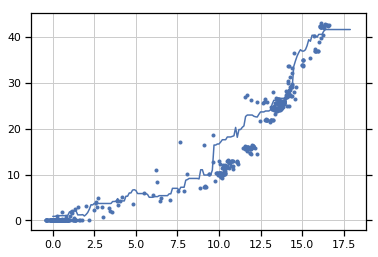

In [4]:
df6 = df4.loc[(df['Draft Mid-1 (meters)'] < 7) & (df['Draft Mid-1 (meters)'] > 5)
       & (df['Weather Service Apparent Wind Speed (knots)'] < 11) & (df['Weather Service Apparent Wind Speed (knots)'] > 9)]

df5 = pd.DataFrame(columns=df4.drop('Main Engine Fuel Consumption (MT/day)', 1).columns)
df5['Speed Through Water (knots)'] = np.arange(0,18, .1)

df5['Main Engine Using HFO (bool)'] = 1
df5['Main Engine Using MGO (bool)'] = 0
df5['Draft Forward (meters)'] = 6
df5['Draft Aft (meters)'] = 6
df5['Draft Mid-1 (meters)'] = 10
df5['Draft Mid-2 (meters)'] = 10
df5['Heading (degrees)'] = 0
df5['Rudder Angle (degrees)'] = 0
df5['Weather Service Apparent Wind Speed (knots)'] = 0
df5['Weather Service Apparent Wind Direction (degrees from bow)'] = 0
df5['Weather Service Temperature (celsius)'] = 10
df5['Water Depth (meters)'] = 50
df5['Trim'] = -2
df5['Draft'] = -4
df5['Apparent Current Direction'] = 0
df5['Apparent Current Speed'] = 0

plt.scatter(df6.iloc[:, 7], df6.iloc[:, 0], marker='.')
plt.plot(np.arange(0,18, .1), model.model.predict(df5))
plt.show()

In [57]:
import numpy as np

In [59]:
df4['Wind'] = df4['Weather Service Apparent Wind Speed (knots)'] * np.cos(df4['Weather Service Apparent Wind Direction (degrees from bow)'])

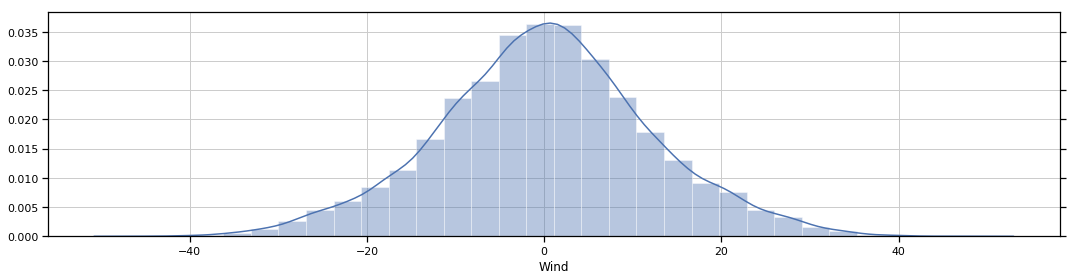

count    14040.000000
mean         0.048749
std         12.051457
min        -45.538388
25%         -7.596247
50%          0.105724
75%          7.527855
max         47.706802
Name: Wind, dtype: float64


In [60]:
vs = EDA.Visual(df4)
vs.hist('Wind')

In [71]:
df6 = df4.loc[(df['Draft Mid-1 (meters)'] < 7) & (df['Draft Mid-1 (meters)'] > 5)
        & (df4['Wind'] > 0)]


In [80]:
df6 = df4.loc[(df['Draft Mid-1 (meters)'] < 7) & (df['Draft Mid-1 (meters)'] > 5)
       & (df4['Wind'] < -30) & (df4['Wind'] > -40)]

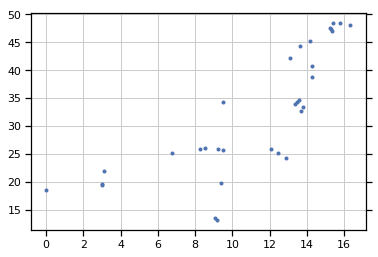

In [81]:
plt.scatter(df6.iloc[:, 7], df6.iloc[:, 0], marker='.')
plt.show()

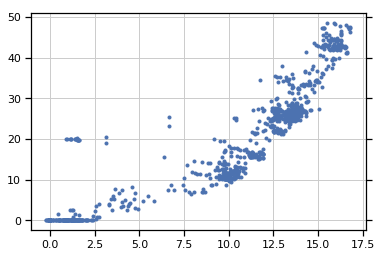

In [87]:
df6 = df4.loc[(df['Draft Mid-1 (meters)'] < 7) & (df['Draft Mid-1 (meters)'] > 5)
       & (df4['Wind'] < 20) & (df4['Wind'] > 10)]
plt.scatter(df6.iloc[:, 7], df6.iloc[:, 0], marker='.')
plt.show()

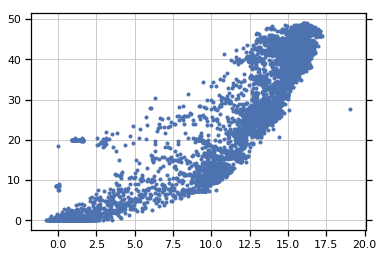

In [83]:
plt.scatter(df4.iloc[:, 7], df4.iloc[:, 0], marker='.')
plt.show()

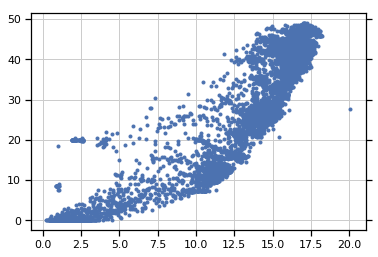

In [109]:
plt.scatter(df4.iloc[:, 7]+1, df4.iloc[:, 0], marker='.')
plt.show()

In [112]:
df4['Relation'] = df4.iloc[:, 0]/(df4.iloc[:, 7]+1 )

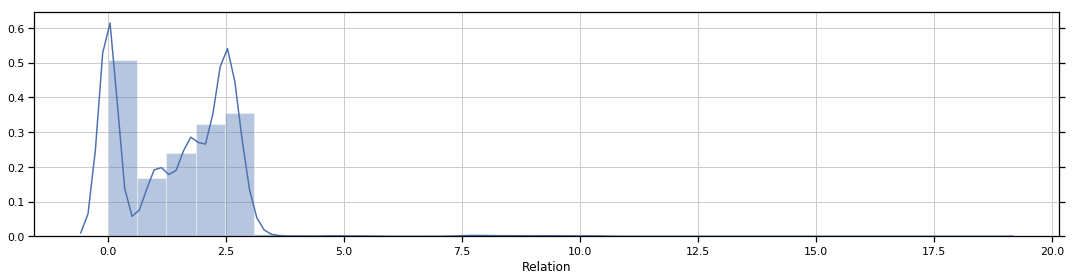

count    14040.000000
mean         1.459097
std          1.217720
min          0.000000
25%          0.000000
50%          1.691581
75%          2.453998
max         18.594490
Name: Relation, dtype: float64


In [113]:
vs = EDA.Visual(df4)
vs.hist('Relation')

In [88]:
df4.columns

Index(['Main Engine Fuel Consumption (MT/day)', 'Main Engine Using HFO (bool)',
       'Main Engine Using MGO (bool)', 'Draft Forward (meters)',
       'Draft Aft (meters)', 'Draft Mid-1 (meters)', 'Draft Mid-2 (meters)',
       'Speed Through Water (knots)', 'Heading (degrees)',
       'Rudder Angle (degrees)', 'Weather Service Apparent Wind Speed (knots)',
       'Weather Service Apparent Wind Direction (degrees from bow)',
       'Weather Service Temperature (celsius)', 'Water Depth (meters)', 'Trim',
       'Draft', 'Apparent Current Direction', 'Apparent Current Speed',
       'Wind'],
      dtype='object')

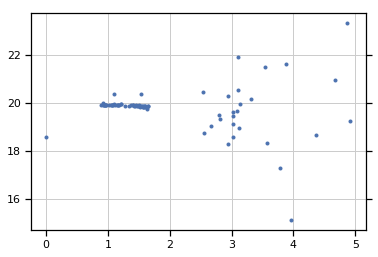

In [94]:
df6 = df4.loc[(df['Main Engine Fuel Consumption (MT/day)'] < 25) & (df['Main Engine Fuel Consumption (MT/day)'] > 15)
       & (df4['Speed Through Water (knots)'] < 5)]
plt.scatter(df6.iloc[:, 7], df6.iloc[:, 0], marker='.')
plt.show()

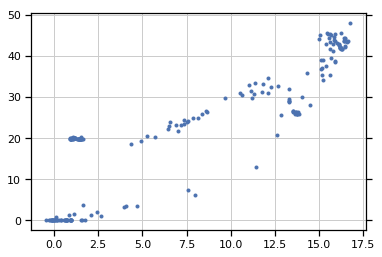

In [105]:
df6 = df4.loc[(df['Water Depth (meters)'] > 240)]
plt.scatter(df6.iloc[:, 7], df6.iloc[:, 0], marker='.')
plt.show()

In [95]:
df6

,Main Engine Fuel Consumption (MT/day),Main Engine Using HFO (bool),Main Engine Using MGO (bool),Draft Forward (meters),Draft Aft (meters),Draft Mid-1 (meters),Draft Mid-2 (meters),Speed Through Water (knots),Heading (degrees),Rudder Angle (degrees),Weather Service Apparent Wind Speed (knots),Weather Service Apparent Wind Direction (degrees from bow),Weather Service Temperature (celsius),Water Depth (meters),Trim,Draft,Apparent Current Direction,Apparent Current Speed,Wind
2061,19.990358,1.0,0.0,5.232845,7.571271,6.363606,6.488215,0.915337,271.493646,359.369511,15.107961,-250.558264,22.102070,244.000000,-2.338425,4.633042,-47.644945,-0.064422,10.855122
2062,20.385306,1.0,0.0,5.239343,7.577058,6.282435,6.384767,1.103957,265.004121,2.548074,14.314569,-234.743284,22.075419,244.000000,-2.337715,4.714464,-51.204594,0.048101,-9.162788
2063,19.907595,1.0,0.0,5.309496,7.588858,6.160593,6.219762,0.963210,254.203371,359.288830,14.182832,-222.718557,22.086530,244.000000,-2.279362,4.803293,-60.796629,-0.039402,-13.396641
2064,19.896994,1.0,0.0,5.345597,7.588915,6.303179,6.360153,0.944027,257.949999,359.331783,14.316691,-226.585723,22.098085,244.000000,-2.243318,4.646727,-54.430710,-0.049286,13.235903
2065,19.903176,1.0,0.0,5.405628,7.599932,6.342333,6.398192,0.954572,253.626333,359.311376,14.196401,-222.131122,22.110085,244.000000,-2.194304,4.568881,-56.571476,0.101769,-8.578349
2066,19.901338,1.0,0.0,5.377380,7.601917,6.379278,6.442074,0.942881,261.383015,359.326828,14.250293,-231.016607,22.122528,244.000000,-2.224537,4.546761,-46.998065,-0.108245,1.557961
2067,19.901939,1.0,0.0,5.304969,7.610270,6.443872,6.506717,0.926283,270.920407,359.306819,14.497287,-241.242680,22.141711,244.000000,-2.305302,4.525757,-38.523822,0.076591,-11.453150
2068,19.904569,1.0,0.0,5.198841,7.586613,6.488835,6.585231,0.942924,280.624297,359.305093,17.611675,-253.315695,22.260221,244.000000,-2.387773,4.541502,-28.160370,-0.110991,-7.140905
2069,19.908067,1.0,0.0,5.246058,7.603380,6.528246,6.583325,0.883469,283.282814,359.377644,17.697837,-255.662804,22.279924,244.000000,-2.357322,4.487884,-28.940556,-0.083393,-6.515110
2070,19.919262,1.0,0.0,5.218367,7.581134,6.443196,6.465526,1.056657,277.623507,359.131924,17.429308,-250.215219,22.307220,244.000000,-2.362766,4.610585,-35.454728,-0.063913,7.715876


In [5]:
from sklearn.svm import SVR

In [47]:
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=2, epsilon=0.1,
               coef0=0)

In [48]:
%%time
svr_poly.fit(df6.iloc[:, 7].values.reshape(-1, 1), df6.iloc[:, 0].values.reshape(-1, 1))

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 53.2 s, sys: 4 ms, total: 53.2 s
Wall time: 53.2 s


SVR(C=100, cache_size=200, coef0=0, degree=2, epsilon=0.5, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [23]:
%%time
svr_poly.fit(df6.iloc[:, 7].values.reshape(-1, 1), df6.iloc[:, 0].values.reshape(-1, 1))

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 18.6 s, sys: 3.99 ms, total: 18.6 s
Wall time: 18.6 s


SVR(C=100, cache_size=200, coef0=1, degree=2, epsilon=1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

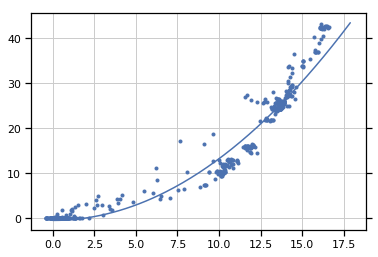

In [46]:
plt.scatter(df6.iloc[:, 7], df6.iloc[:, 0], marker='.')
plt.plot(np.arange(0,18, .1), svr_poly.predict(np.arange(0,18, .1).reshape(-1, 1)))
plt.show()

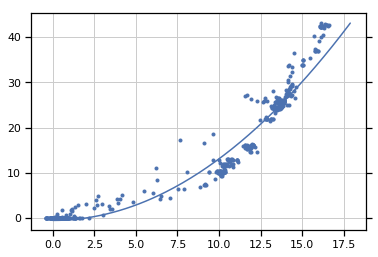

In [49]:
plt.scatter(df6.iloc[:, 7], df6.iloc[:, 0], marker='.')
plt.plot(np.arange(0,18, .1), svr_poly.predict(np.arange(0,18, .1).reshape(-1, 1)))
plt.show()

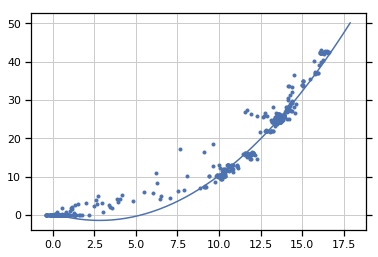

In [15]:
plt.scatter(df6.iloc[:, 7], df6.iloc[:, 0], marker='.')
plt.plot(np.arange(0,18, .1), svr_poly.predict(np.arange(0,18, .1).reshape(-1, 1)))
plt.show()

In [53]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.5, epsilon=.5)

In [54]:
%%time
svr_poly.fit(df6.iloc[:, 7].values.reshape(-1, 1), df6.iloc[:, 0].values.reshape(-1, 1))

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 51.6 s, sys: 0 ns, total: 51.6 s
Wall time: 51.6 s


SVR(C=100, cache_size=200, coef0=0, degree=2, epsilon=0.5, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

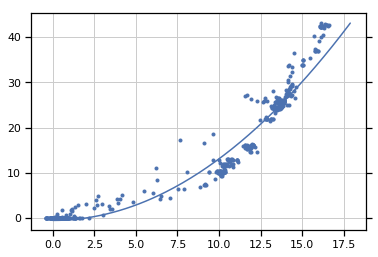

In [55]:
plt.scatter(df6.iloc[:, 7], df6.iloc[:, 0], marker='.')
plt.plot(np.arange(0,18, .1), svr_poly.predict(np.arange(0,18, .1).reshape(-1, 1)))
plt.show()